# Indian Food Data EDA Case Study

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("Downloads/4. Indian food.csv")
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,img_url
0,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10,50,sweet,dessert,West Bengal,East,https://www.crazymasalafood.com/wp-content/ima...
1,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
2,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
3,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10,40,bitter,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
4,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...


# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
 9   img_url         254 non-null    object
dtypes: int64(2), object(8)
memory usage: 20.1+ KB


In [6]:
df.isnull().sum()/df.shape[0]/100

name              0.000000
ingredients       0.000000
diet              0.000000
prep_time         0.000000
cook_time         0.000000
flavor_profile    0.000000
course            0.000000
state             0.000000
region            0.000039
img_url           0.000039
dtype: float64

In [7]:
df.dropna(subset=["region", "img_url"], inplace=True)
df.drop_duplicates(inplace=True)

In [8]:
df['flavor_profile'] = df['flavor_profile'].replace('-1', 'Unknown').replace(-1, 'Unknown')
df['state'] = df['state'].replace('-1', 'Unknown').replace(-1, 'Unknown')
df['diet'] = df['diet'].replace('-1', 'Unknown').replace(-1, 'Unknown')

# EDA Questions

In [10]:
print("\n1. Number of unique dishes:")
df["name"].nunique()


1. Number of unique dishes:


253

In [11]:
print("\n2. Count of dishes by flavor profile:")

F_p= df.groupby("flavor_profile")["name"].count()


2. Count of dishes by flavor profile:



Visualizing flavor profile distribution...


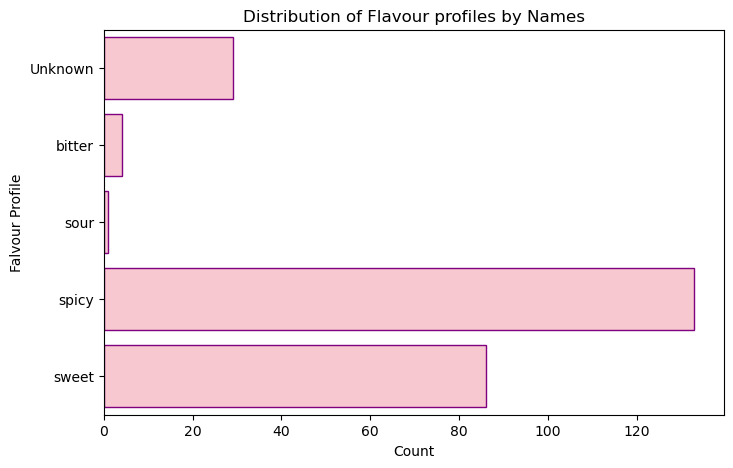

In [12]:
print("\nVisualizing flavor profile distribution...")
plt.figure(figsize=(8,5))
sns.barplot(x=F_p.values, y=F_p.index, color= "pink", edgecolor="purple")
plt.xlabel("Count")
plt.ylabel("Falvour Profile")
plt.title("Distribution of Flavour profiles by Names")
plt.show()

In [13]:
print("\n3. Top 5 states by dish count:")
T_S= df["state"].value_counts().head(5)


3. Top 5 states by dish count:


Visualizing state contributions...


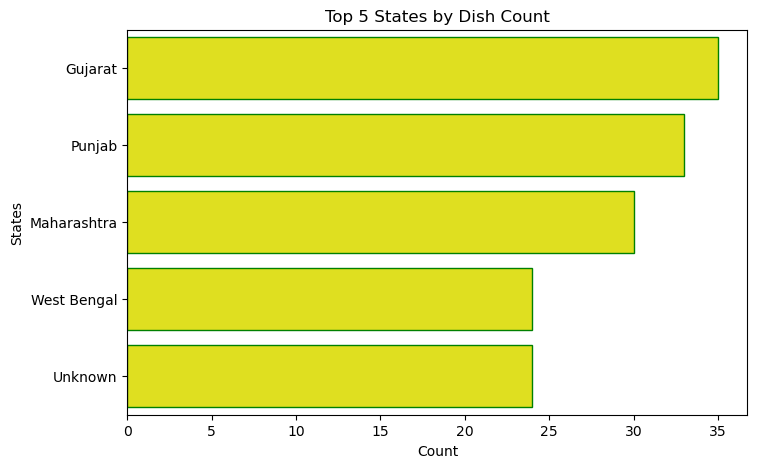

In [14]:
print("Visualizing state contributions...")
plt.figure(figsize=(8,5))
sns.barplot(x=T_S.values, y=T_S.index, color= "yellow", edgecolor="green")
plt.xlabel("Count")
plt.ylabel("States")
plt.title("Top 5 States by Dish Count")
plt.show()

In [15]:
print("\n4.Average prep time by diet type:")
N_V= df.groupby("diet")["prep_time"].mean()
print(N_V)


4.Average prep time by diet type:
diet
non vegetarian    27.678571
vegetarian        31.586667
Name: prep_time, dtype: float64


Visualizing prep time by diet...


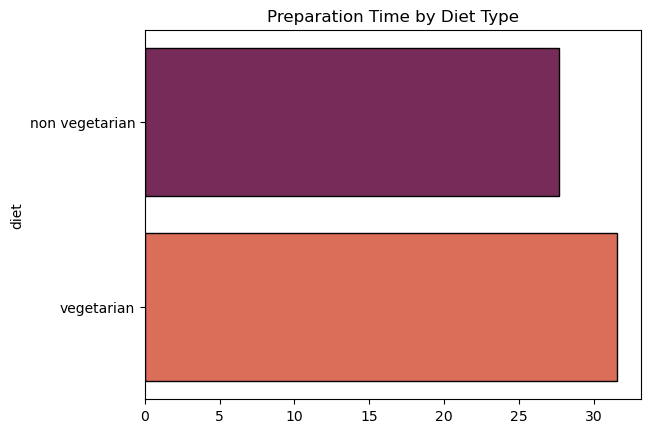

In [16]:
print("Visualizing prep time by diet...")
sns.barplot(x=N_V.values, y=N_V.index, palette="rocket", edgecolor="black", hue=N_V.index)
plt.title('Preparation Time by Diet Type')
plt.show()

In [17]:
print("\n5. Dish count by course:")
c_n= df.groupby("course")["name"].nunique()
print(c_n)


5. Dish count by course:
course
dessert         83
main course    129
snack           39
starter          2
Name: name, dtype: int64


Visualizing course distribution...


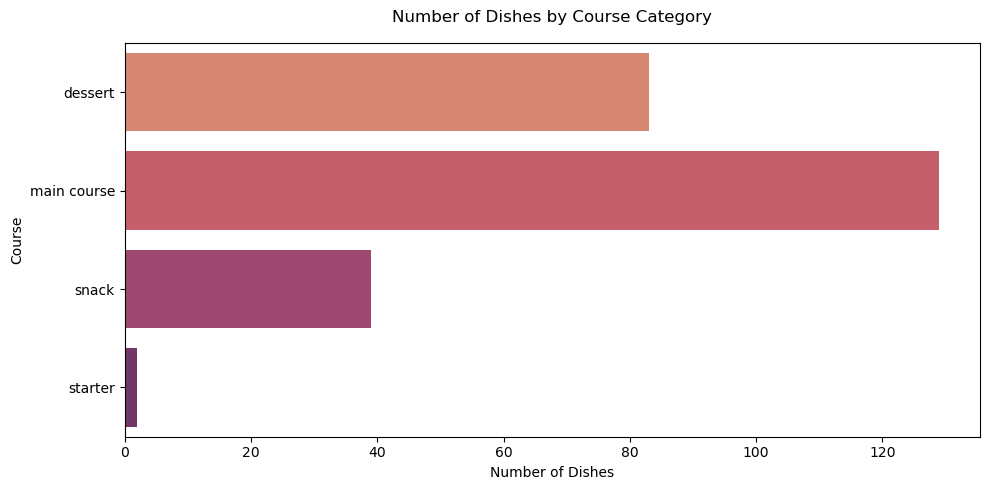

In [18]:
print("Visualizing course distribution...")
plt.figure(figsize=(10,5))
sns.barplot(x=c_n.values, y=c_n.index, palette="flare", hue=c_n.index) 
plt.title('Number of Dishes by Course Category', pad=15)
plt.xlabel('Number of Dishes')
plt.ylabel('Course')
plt.tight_layout()
plt.show()

In [19]:
flavor_map = {'sweet':1, 'spicy':2, 'sour':3, 'bitter':4}
df['flavor_encoded'] = df['flavor_profile'].map(flavor_map)

correlation = df['flavor_encoded'].corr(df['cook_time'])
print(f"\n6. Encoded Flavor vs Cook Time Correlation: {correlation:.2f}")


6. Encoded Flavor vs Cook Time Correlation: -0.11


Visualizing cooking time vs flavor profile...


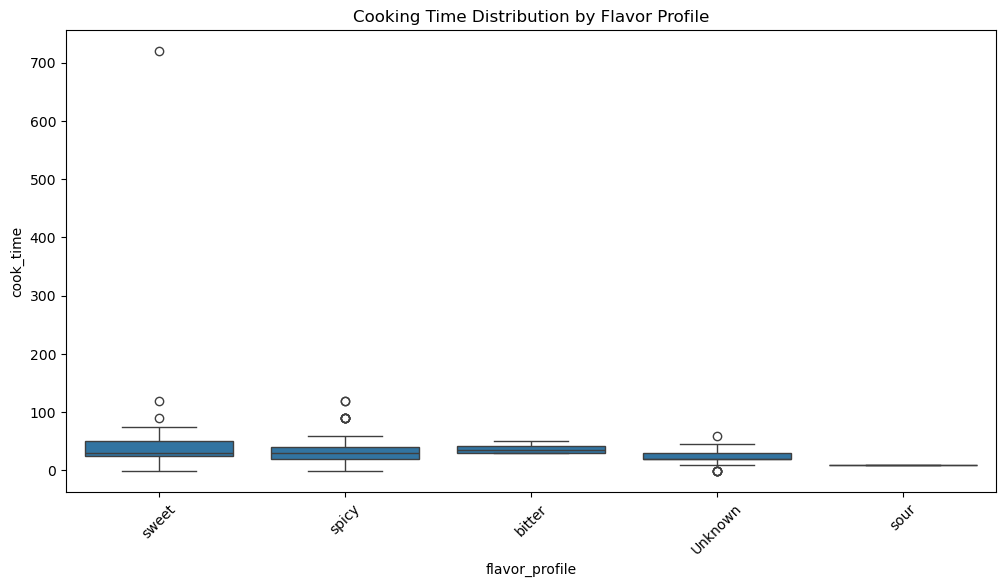

In [20]:
print("Visualizing cooking time vs flavor profile...")
plt.figure(figsize=(12,6))
sns.boxplot(x='flavor_profile', y='cook_time', data=df)
plt.title('Cooking Time Distribution by Flavor Profile')
plt.xticks(rotation=45)
plt.show()

In [21]:
print("\n7. Most common ingredients:")
from collections import Counter
all_ingredients = ','.join(df['ingredients']).split(',')
top_5_ingredients = Counter(all_ingredients).most_common(5)

print("Top 5 Ingredients:")
for ing, count in top_5_ingredients:
    print(f"- {ing.strip()}: {count}")


7. Most common ingredients:
Top 5 Ingredients:
- sugar: 44
- ginger: 29
- garam masala: 27
- ghee: 25
- curry leaves: 25



8. Distribution of dishes based on diet:


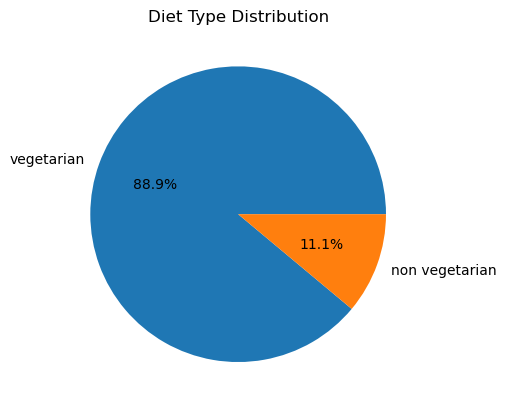

In [22]:
print("\n8. Distribution of dishes based on diet:")
df['diet'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Diet Type Distribution')
plt.ylabel('')
plt.show()


9. Relationship between number of ingredients and cooking time:


<Figure size 1000x600 with 0 Axes>

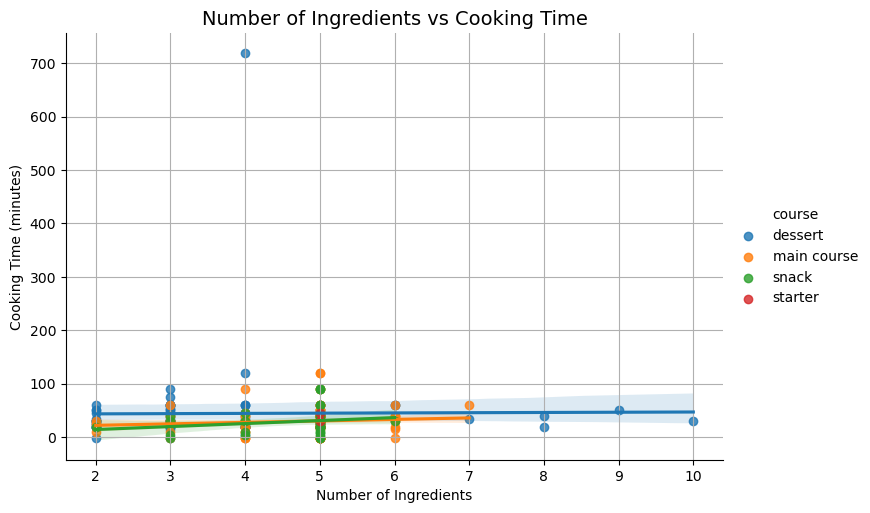


Insight: Weak or no clear trend between ingredients and cooking time.


In [23]:
print("\n9. Relationship between number of ingredients and cooking time:")

df['ingredient_count'] = df['ingredients'].str.split(',').str.len()

plt.figure(figsize=(10, 6))
sns.lmplot(x='ingredient_count', y='cook_time', hue='course', 
           data=df, height=5, aspect=1.5)

plt.title("Number of Ingredients vs Cooking Time", fontsize=14)
plt.xlabel("Number of Ingredients")
plt.ylabel("Cooking Time (minutes)")
plt.grid(True)
plt.show()

if correlation > 0.3:
    print("\nInsight: More ingredients tend to increase cooking time.")
elif correlation < -0.3:
    print("\nInsight: Dishes with fewer ingredients take longer to cook.")
else:
    print("\nInsight: Weak or no clear trend between ingredients and cooking time.")


10. Correlation between preparation time and cooking time:


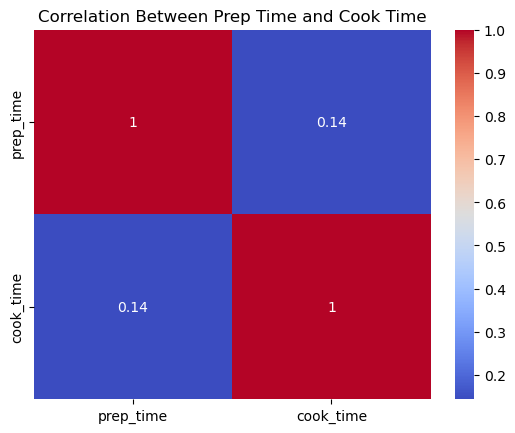

In [24]:
print("\n10. Correlation between preparation time and cooking time:")
corr = df[['prep_time', 'cook_time']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Prep Time and Cook Time')
plt.show()